# Usage (quick version)

## Preparation

In [1]:
# Standard users
# !pip install covsirphy
# Developers (Note: this notebook is in example directory)
import os
os.chdir("../")

In [2]:
import warnings

In [3]:
import covsirphy as cs
cs.__version__

'2.8.3-alpha.new.224'

## Dataset preparation
Download the datasets to "input" direcotry and load them.

If "input" directory has the datasets, `DataLoader` will load the local files. If the datasets were updated in remote servers, `DataLoader` will update the local files automatically.
Download the datasets to "input" direcotry and load them.

If "input" directory has the datasets, `DataLoader` will load the local files. If the datasets were updated in remote servers, `DataLoader` will update the local files automatically.

In [4]:
data_loader = cs.DataLoader("input")
# The number of cases (JHU style)
jhu_data = data_loader.jhu(verbose=True)
# Population in each country
population_data = data_loader.population(verbose=True)
# Government Response Tracker (OxCGRT)
oxcgrt_data = data_loader.oxcgrt(verbose=True)

Retrieving datasets from COVID-19 Data Hub: https://covid19datahub.io/


Detailed citaition list:

Open Government Data, United Kingdom (2020), https://coronavirus.data.gov.uk
Department of Disease Control of Thailand (2020), https://covid19.th-stat.com/
World Health Organization (2020), https://covid19.who.int
Ireland Health Protection Surveillance Centre (HPSC) and Health Service Executive (HSE) (2020), https://covid19ireland-geohive.hub.arcgis.com/
The COVID Tracking Project (2020), https://covidtracking.com
Ministry of Health of Croatia (2020), https://data.gov.hr/dataset/koronavirus/resource/08fab529-ebba-46c7-be79-05782ddb02ef
Open Government Data, Latvia (2020), https://data.gov.lv/dati/dataset
Taiwan Ministry of Health and Welfare (2020), https://data.gov.tw/dataset/120451
Wikipedia (2020), https://en.wikipedia.org/wiki
Epistat, Belgian Infectious Diseases (2020), https://epistat.sciensano.be
Johns Hopkins Center for Systems Science and Engineering (2020), https://github.com/CSSEGISandData/COVID-19
Covid19data.com.au (2020), https://github.com/M3IT/COVID-19_Data
Data Science

### The number of cases (JHU style)

In [5]:
# Description/citation
print(jhu_data.citation)

(Secondary source) Guidotti, E., Ardia, D., (2020), "COVID-19 Data Hub", Journal of Open Source Software 5(51):2376, doi: 10.21105/joss.02376.
We can get Citation list of primary sources with DataLoader(...).covid19dh_citation

In [6]:
print(data_loader.covid19dh_citation)

Open Government Data, United Kingdom (2020), https://coronavirus.data.gov.uk
Department of Disease Control of Thailand (2020), https://covid19.th-stat.com/
World Health Organization (2020), https://covid19.who.int
Ireland Health Protection Surveillance Centre (HPSC) and Health Service Executive (HSE) (2020), https://covid19ireland-geohive.hub.arcgis.com/
The COVID Tracking Project (2020), https://covidtracking.com
Ministry of Health of Croatia (2020), https://data.gov.hr/dataset/koronavirus/resource/08fab529-ebba-46c7-be79-05782ddb02ef
Open Government Data, Latvia (2020), https://data.gov.lv/dati/dataset
Taiwan Ministry of Health and Welfare (2020), https://data.gov.tw/dataset/120451
Wikipedia (2020), https://en.wikipedia.org/wiki
Epistat, Belgian Infectious Diseases (2020), https://epistat.sciensano.be
Johns Hopkins Center for Systems Science and Engineering (2020), https://github.com/CSSEGISandData/COVID-19
Covid19data.com.au (2020), https://github.com/M3IT/COVID-19_Data
Data Science

In [7]:
# Raw data
jhu_data.raw.tail()

,ObservationDate,Confirmed,Recovered,Deaths,Population,ISO3,Province/State,Country/Region,school_closing,workplace_closing,cancel_events,gatherings_restrictions,transport_closing,stay_home_restrictions,internal_movement_restrictions,international_movement_restrictions,information_campaigns,testing_policy,contact_tracing,stringency_index
286082,2020-10-13,14,14,0,107808.0,COL,Vichada,Colombia,3,1,2,3,1,0,0,4,2,2,2,62.04
286083,2020-10-14,14,14,0,107808.0,COL,Vichada,Colombia,3,1,2,3,1,0,0,4,2,2,2,62.04
286084,2020-10-15,14,14,0,107808.0,COL,Vichada,Colombia,3,1,2,3,1,0,0,4,2,2,2,62.04
286085,2020-10-16,14,14,0,107808.0,COL,Vichada,Colombia,3,1,2,3,1,0,0,4,2,2,2,62.04
286086,2020-10-17,14,14,0,107808.0,COL,Vichada,Colombia,3,1,2,3,1,0,0,4,2,2,2,62.04


In [8]:
# Cleaned data
jhu_data.cleaned().tail()

,Date,Country,Province,Confirmed,Infected,Fatal,Recovered
286082,2020-10-13,Colombia,Vichada,14,0,0,14
286083,2020-10-14,Colombia,Vichada,14,0,0,14
286084,2020-10-15,Colombia,Vichada,14,0,0,14
286085,2020-10-16,Colombia,Vichada,14,0,0,14
286086,2020-10-17,Colombia,Vichada,14,0,0,14


In [9]:
# Subset for a country
jhu_data.subset("Japan", province="Tokyo").tail()

,Date,Confirmed,Infected,Fatal,Recovered
208,2020-10-13,27959,2178,423,25358
209,2020-10-14,28136,2149,425,25562
210,2020-10-15,28420,2147,427,25846
211,2020-10-16,28604,2082,431,26091
212,2020-10-17,28839,2099,434,26306


In [10]:
# Total
total_df = jhu_data.total()
total_df.tail()

,Confirmed,Infected,Fatal,Recovered,Fatal per Confirmed,Recovered per Confirmed,Fatal per (Fatal or Recovered)
Date,,,,,,,
2020-10-13,37730979,10590904,1078178,26061897,0.014288,0.345365,0.039726
2020-10-14,38108734,10764457,1084120,26260157,0.014224,0.344543,0.039647
2020-10-15,38494860,10949845,1089933,26455082,0.014157,0.343618,0.039569
2020-10-16,38881091,11150575,1095819,26634697,0.014092,0.342515,0.039517
2020-10-17,38881939,11149879,1095826,26636234,0.014092,0.342527,0.039515


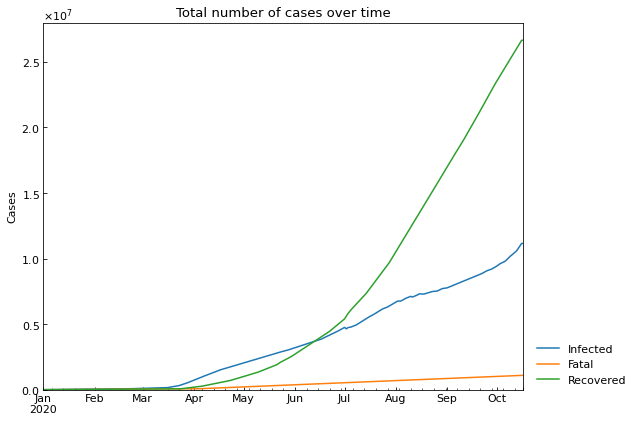

In [11]:
# Plot the total values
cs.line_plot(total_df[["Infected", "Fatal", "Recovered"]], "Total number of cases over time")

### (Optional) Replace the dataset in Japan


In [12]:
jhu_data.subset("Japan").tail()

,Date,Confirmed,Infected,Fatal,Recovered
247,2020-10-13,90159,5926,1637,82596
248,2020-10-14,90710,5932,1646,83132
249,2020-10-15,91418,5953,1649,83816
250,2020-10-16,92060,5967,1664,84429
251,2020-10-17,92684,6002,1670,85012


In [13]:
japan_data = data_loader.japan()
print(japan_data.citation)

Lisphilar (2020), COVID-19 dataset in Japan, GitHub repository, https://github.com/lisphilar/covid19-sir/data/japan

In [14]:
jhu_data.replace(japan_data)
jhu_data.subset("Japan").tail()

,Date,Confirmed,Infected,Fatal,Recovered
245,2020-10-13,89673,5418,1634,82621
246,2020-10-14,90140,5344,1638,83158
247,2020-10-15,90710,5227,1646,83837
248,2020-10-16,91431,5330,1650,84451
249,2020-10-17,92063,5372,1661,85030


### Population in each country

In [15]:
# Description/citation
print(population_data.citation)

(Secondary source) Guidotti, E., Ardia, D., (2020), "COVID-19 Data Hub", Journal of Open Source Software 5(51):2376, doi: 10.21105/joss.02376.
We can get Citation list of primary sources with DataLoader(...).covid19dh_citation

In [16]:
# Raw data (the same as jhu_data)
population_data.raw.tail()

,ObservationDate,Confirmed,Recovered,Deaths,Population,ISO3,Province/State,Country/Region,school_closing,workplace_closing,cancel_events,gatherings_restrictions,transport_closing,stay_home_restrictions,internal_movement_restrictions,international_movement_restrictions,information_campaigns,testing_policy,contact_tracing,stringency_index
286082,2020-10-13,14,14,0,107808.0,COL,Vichada,Colombia,3,1,2,3,1,0,0,4,2,2,2,62.04
286083,2020-10-14,14,14,0,107808.0,COL,Vichada,Colombia,3,1,2,3,1,0,0,4,2,2,2,62.04
286084,2020-10-15,14,14,0,107808.0,COL,Vichada,Colombia,3,1,2,3,1,0,0,4,2,2,2,62.04
286085,2020-10-16,14,14,0,107808.0,COL,Vichada,Colombia,3,1,2,3,1,0,0,4,2,2,2,62.04
286086,2020-10-17,14,14,0,107808.0,COL,Vichada,Colombia,3,1,2,3,1,0,0,4,2,2,2,62.04


In [17]:
# Cleaned data
population_data.cleaned().tail()

,ISO3,Country,Province,Date,Population
244362,COL,Colombia,Vichada,2020-10-13,107808
244363,COL,Colombia,Vichada,2020-10-14,107808
244364,COL,Colombia,Vichada,2020-10-15,107808
244365,COL,Colombia,Vichada,2020-10-16,107808
244366,COL,Colombia,Vichada,2020-10-17,107808


In [18]:
population_data.value("Japan", province=None)

126529100

In [19]:
# Register population value of Tokyo in Japan
# https://www.metro.tokyo.lg.jp/tosei/hodohappyo/press/2020/06/11/07.html
population_data.update(14_002_973, "Japan", province="Tokyo")
population_data.value("Japan", province="Tokyo")

14002973

### Government Response Tracker (OxCGRT)

In [20]:
# Description/citation
print(oxcgrt_data.citation)

(Secondary source) Guidotti, E., Ardia, D., (2020), "COVID-19 Data Hub", Journal of Open Source Software 5(51):2376, doi: 10.21105/joss.02376.
We can get Citation list of primary sources with DataLoader(...).covid19dh_citation

In [21]:
# Raw data (the same as jhu_data)
oxcgrt_data.raw.tail()

,ObservationDate,Confirmed,Recovered,Deaths,Population,ISO3,Province/State,Country/Region,school_closing,workplace_closing,cancel_events,gatherings_restrictions,transport_closing,stay_home_restrictions,internal_movement_restrictions,international_movement_restrictions,information_campaigns,testing_policy,contact_tracing,stringency_index
286082,2020-10-13,14,14,0,107808.0,COL,Vichada,Colombia,3,1,2,3,1,0,0,4,2,2,2,62.04
286083,2020-10-14,14,14,0,107808.0,COL,Vichada,Colombia,3,1,2,3,1,0,0,4,2,2,2,62.04
286084,2020-10-15,14,14,0,107808.0,COL,Vichada,Colombia,3,1,2,3,1,0,0,4,2,2,2,62.04
286085,2020-10-16,14,14,0,107808.0,COL,Vichada,Colombia,3,1,2,3,1,0,0,4,2,2,2,62.04
286086,2020-10-17,14,14,0,107808.0,COL,Vichada,Colombia,3,1,2,3,1,0,0,4,2,2,2,62.04


In [22]:
# Cleaned data
oxcgrt_data.cleaned().tail()

,Date,Country,ISO3,School_closing,Workplace_closing,Cancel_events,Gatherings_restrictions,Transport_closing,Stay_home_restrictions,Internal_movement_restrictions,International_movement_restrictions,Information_campaigns,Testing_policy,Contact_tracing,Stringency_index
286082,2020-10-13,Colombia,COL,3,1,2,3,1,0,0,4,2,2,2,62.04
286083,2020-10-14,Colombia,COL,3,1,2,3,1,0,0,4,2,2,2,62.04
286084,2020-10-15,Colombia,COL,3,1,2,3,1,0,0,4,2,2,2,62.04
286085,2020-10-16,Colombia,COL,3,1,2,3,1,0,0,4,2,2,2,62.04
286086,2020-10-17,Colombia,COL,3,1,2,3,1,0,0,4,2,2,2,62.04


In [23]:
# Subset for a country
oxcgrt_data.subset("Japan").tail()

,Date,School_closing,Workplace_closing,Cancel_events,Gatherings_restrictions,Transport_closing,Stay_home_restrictions,Internal_movement_restrictions,International_movement_restrictions,Information_campaigns,Testing_policy,Contact_tracing,Stringency_index
286,2020-10-13,1,1,1,0,0,1,1,1,2,2,1,31.48
287,2020-10-14,1,1,1,0,0,1,1,1,2,2,1,31.48
288,2020-10-15,1,1,1,0,0,1,1,1,2,2,1,31.48
289,2020-10-16,1,1,1,0,0,1,1,1,2,2,1,31.48
290,2020-10-17,1,1,1,0,0,1,1,1,2,2,1,31.48


In [24]:
# Subset for a country (using ISO3 code)
oxcgrt_data.subset("JPN").tail()

,Date,School_closing,Workplace_closing,Cancel_events,Gatherings_restrictions,Transport_closing,Stay_home_restrictions,Internal_movement_restrictions,International_movement_restrictions,Information_campaigns,Testing_policy,Contact_tracing,Stringency_index
286,2020-10-13,1,1,1,0,0,1,1,1,2,2,1,31.48
287,2020-10-14,1,1,1,0,0,1,1,1,2,2,1,31.48
288,2020-10-15,1,1,1,0,0,1,1,1,2,2,1,31.48
289,2020-10-16,1,1,1,0,0,1,1,1,2,2,1,31.48
290,2020-10-17,1,1,1,0,0,1,1,1,2,2,1,31.48


## Scenario analysis
As an example, we will analysis the number of cases in Japan.

In [25]:
scenario = cs.Scenario(jhu_data, population_data, country="Japan", province=None)

### Check records

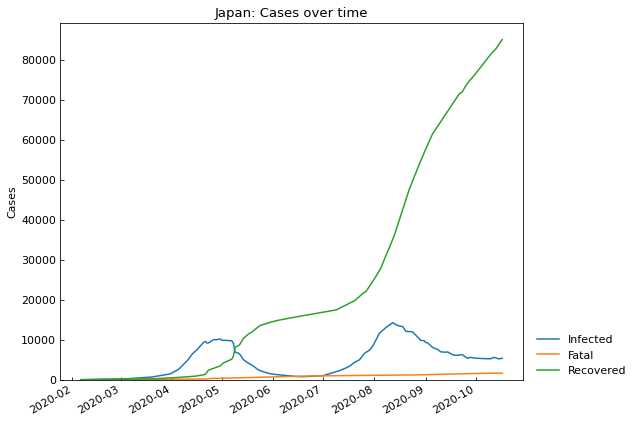

,Date,Confirmed,Infected,Fatal,Recovered
245,2020-10-13,89673,5418,1634,82621
246,2020-10-14,90140,5344,1638,83158
247,2020-10-15,90710,5227,1646,83837
248,2020-10-16,91431,5330,1650,84451
249,2020-10-17,92063,5372,1661,85030


In [26]:
import matplotlib
warnings.simplefilter("ignore", category=matplotlib.MatplotlibDeprecationWarning)
record_df = scenario.records()
record_df.tail()

### S-R trend analysis

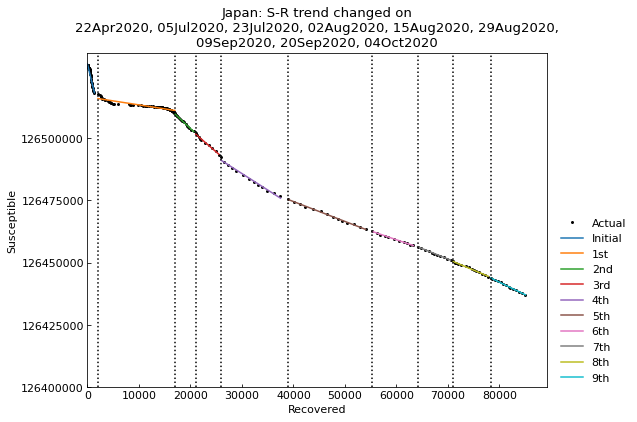

,Type,Start,End,Population
0th,Past,06Feb2020,21Apr2020,126529100
1st,Past,22Apr2020,04Jul2020,126529100
2nd,Past,05Jul2020,22Jul2020,126529100
3rd,Past,23Jul2020,01Aug2020,126529100
4th,Past,02Aug2020,14Aug2020,126529100
5th,Past,15Aug2020,28Aug2020,126529100
6th,Past,29Aug2020,08Sep2020,126529100
7th,Past,09Sep2020,19Sep2020,126529100
8th,Past,20Sep2020,03Oct2020,126529100
9th,Past,04Oct2020,17Oct2020,126529100


In [27]:
scenario.trend(set_phases=True)
scenario.summary()

### Hyperparameter estimation of ODE models
As an example, use SIR-F model.
We can use SIR, SIRD, (SIRFV), (SEWIRF).

In [28]:
scenario.estimate(cs.SIRF)


<SIR-F model: parameter estimation>

Running optimization with 4 CPUs...

	9th phase (04Oct2020 - 17Oct2020): finished 1744 trials in 1 min  0 sec

	3rd phase (23Jul2020 - 01Aug2020): finished  675 trials in 0 min 15 sec

	0th phase (06Feb2020 - 21Apr2020): finished 1814 trials in 1 min  0 sec

	1st phase (22Apr2020 - 04Jul2020): finished 1788 trials in 1 min  0 sec

	2nd phase (05Jul2020 - 22Jul2020): finished 1897 trials in 1 min  0 sec

	5th phase (15Aug2020 - 28Aug2020): finished  247 trials in 0 min  5 sec

	7th phase (09Sep2020 - 19Sep2020): finished  250 trials in 0 min  5 sec

	6th phase (29Aug2020 - 08Sep2020): finished  469 trials in 0 min 10 sec

	4th phase (02Aug2020 - 14Aug2020): finished 1906 trials in 1 min  0 sec

	8th phase (20Sep2020 - 03Oct2020): finished 2102 trials in 1 min  0 sec

Completed optimization. Total: 3 min  6 sec

In [29]:
scenario.summary()

,Type,Start,End,Population,ODE,Rt,theta,kappa,rho,sigma,tau,alpha1 [-],1/alpha2 [day],1/gamma [day],1/beta [day],RMSLE,Trials,Runtime
0th,Past,06Feb2020,21Apr2020,126529100,SIR-F,4.77,0.000430,0.000256,0.012988,0.002465,180,0.000,488,50,9,0.913298,1814,1 min 0 sec
1st,Past,22Apr2020,04Jul2020,126529100,SIR-F,0.41,0.053796,0.000211,0.003896,0.008854,180,0.054,591,14,32,0.887929,1788,1 min 0 sec
2nd,Past,05Jul2020,22Jul2020,126529100,SIR-F,1.92,0.000149,0.000050,0.018266,0.009446,180,0.000,2488,13,6,0.031109,1897,1 min 0 sec
3rd,Past,23Jul2020,01Aug2020,126529100,SIR-F,2.08,0.000952,0.000036,0.016701,0.007968,180,0.001,3443,15,7,0.030779,675,0 min 15 sec
4th,Past,02Aug2020,14Aug2020,126529100,SIR-F,1.52,0.000938,0.000031,0.012918,0.008464,180,0.001,3998,14,9,0.062987,1906,1 min 0 sec
5th,Past,15Aug2020,28Aug2020,126529100,SIR-F,0.79,0.008123,0.000059,0.010480,0.013131,180,0.008,2114,9,11,0.036843,247,0 min 5 sec
6th,Past,29Aug2020,08Sep2020,126529100,SIR-F,0.68,0.000132,0.000168,0.007614,0.010951,180,0.000,743,11,16,0.023057,469,0 min 10 sec
7th,Past,09Sep2020,19Sep2020,126529100,SIR-F,0.87,0.001384,0.000150,0.011513,0.013082,180,0.001,831,9,10,0.018052,250,0 min 5 sec
8th,Past,20Sep2020,03Oct2020,126529100,SIR-F,0.88,0.000235,0.000131,0.011630,0.013060,180,0.000,953,9,10,0.028874,2102,1 min 0 sec
9th,Past,04Oct2020,17Oct2020,126529100,SIR-F,0.99,0.001173,0.000091,0.013481,0.013536,180,0.001,1380,9,9,0.018934,1744,1 min 0 sec


### Accuracy of estimation

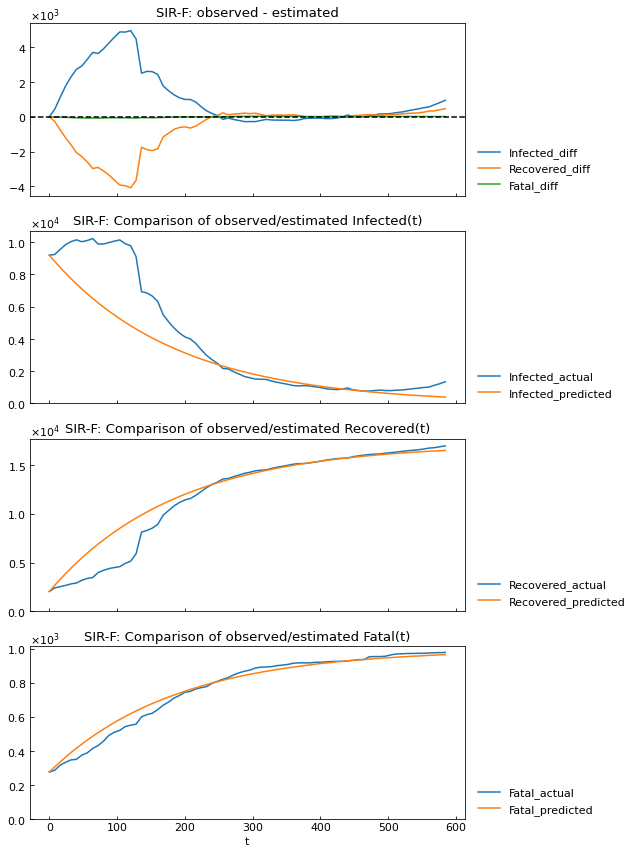

In [30]:
scenario.estimate_accuracy(phase="1st")

### Get parameter value

In [31]:
scenario.get("Rt", phase="4th")

1.52

### Show parameter history

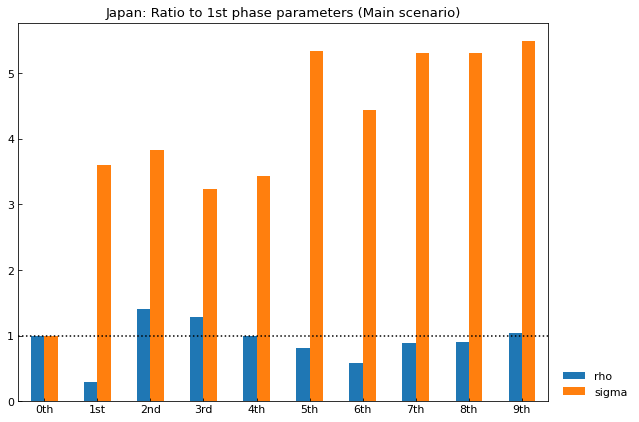

,0th,1st,2nd,3rd,4th,5th,6th,7th,8th,9th
rho,1.0,0.299951,1.406416,1.285861,0.994600,0.806948,0.586227,0.886482,0.895462,1.037940
sigma,1.0,3.591749,3.831709,3.232253,3.433405,5.326698,4.442184,5.306903,5.297869,5.491192


In [32]:
df = scenario.param_history(targets=["rho", "sigma"])
df.T

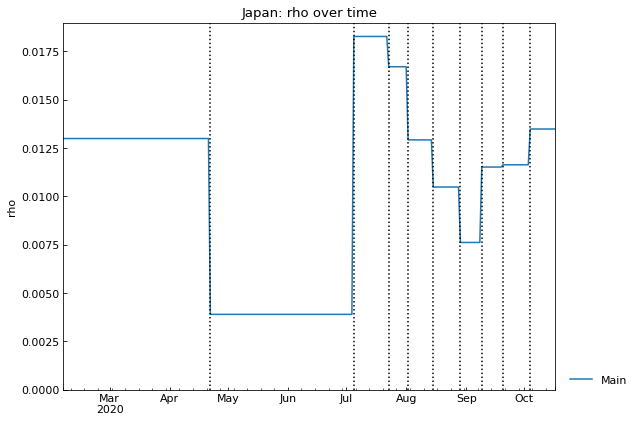

In [33]:
_ = scenario.history(target="rho")

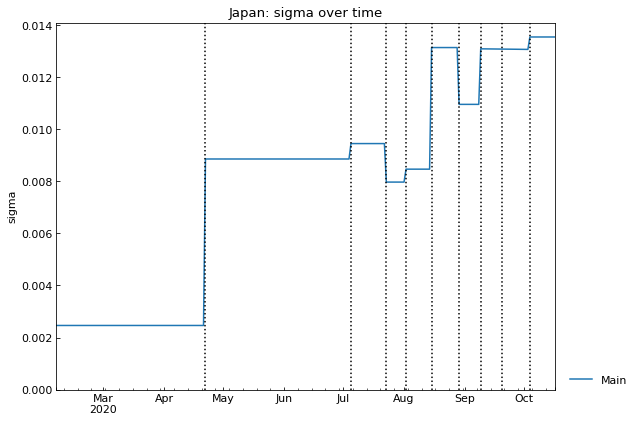

In [34]:
_ = scenario.history(target="sigma")

### Show the history of reproduction number

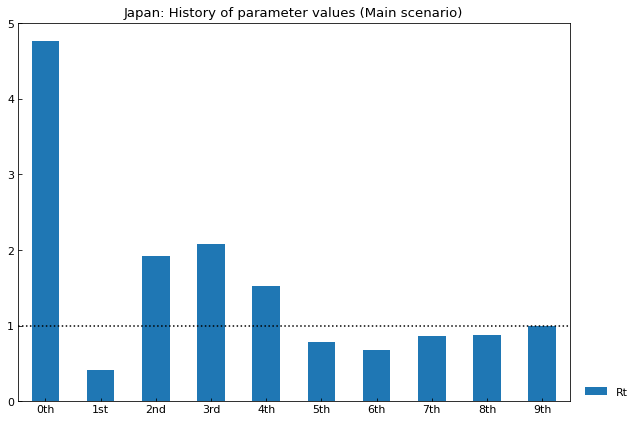

,0th,1st,2nd,3rd,4th,5th,6th,7th,8th,9th
Rt,4.77,0.41,1.92,2.08,1.52,0.79,0.68,0.87,0.88,0.99


In [35]:
df = scenario.param_history(targets=["Rt"], divide_by_first=False, show_box_plot=True)
df.T

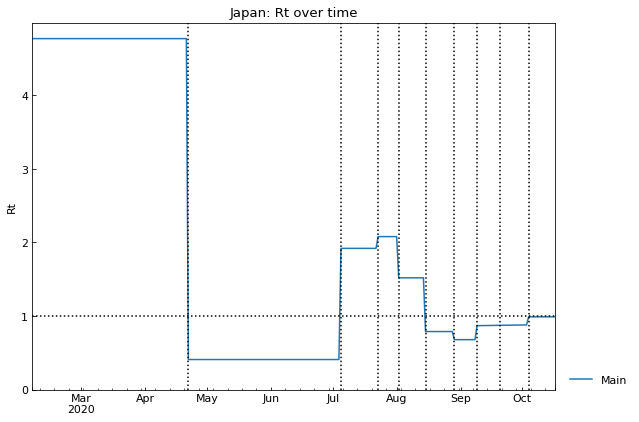

In [36]:
_ = scenario.history(target="Rt")

### Simulate the number of cases

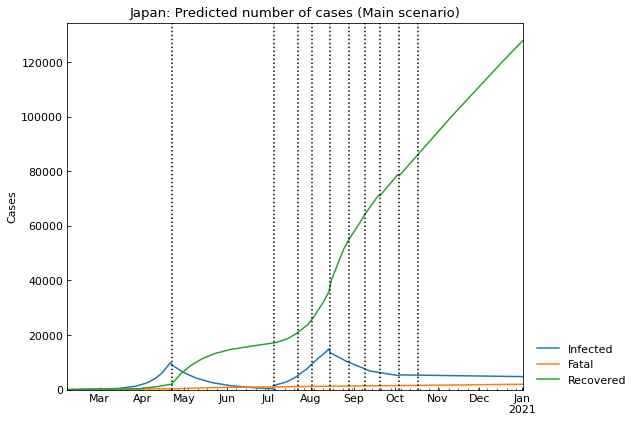

,Date,Confirmed,Fatal,Infected,Recovered
327,2020-12-29,132753,1971,4815,125967
328,2020-12-30,133273,1975,4809,126489
329,2020-12-31,133790,1979,4802,127009
330,2021-01-01,134308,1984,4795,127529
331,2021-01-02,134823,1988,4788,128047


In [37]:
scenario.clear(name="Main")
scenario.add(end_date="01Jan2021", name="Main")
main_sim_df = scenario.simulate(name="Main")
main_sim_df.tail()

### Simulate another scenario
If $\sigma$ will be double in 30 days, how many cases will be?

In [38]:
sigma_current = scenario.get("sigma", name="Main", phase="last")
sigma_current

0.013536447371495276

In [39]:
sigma_new = sigma_current * 2
sigma_new

0.02707289474299055

In [40]:
scenario.clear(name="Medicine")
scenario.add(name="Medicine", days=30, sigma=sigma_current)
scenario.add(name="Medicine", end_date="01Jan2021", sigma=sigma_new)
scenario.summary()

Type      Start        End  Population    ODE    Rt  \
Scenario Phase                                                          
Main     0th      Past  06Feb2020  21Apr2020   126529100  SIR-F  4.77   
         1st      Past  22Apr2020  04Jul2020   126529100  SIR-F  0.41   
         2nd      Past  05Jul2020  22Jul2020   126529100  SIR-F  1.92   
         3rd      Past  23Jul2020  01Aug2020   126529100  SIR-F  2.08   
         4th      Past  02Aug2020  14Aug2020   126529100  SIR-F  1.52   
         5th      Past  15Aug2020  28Aug2020   126529100  SIR-F  0.79   
         6th      Past  29Aug2020  08Sep2020   126529100  SIR-F  0.68   
         7th      Past  09Sep2020  19Sep2020   126529100  SIR-F  0.87   
         8th      Past  20Sep2020  03Oct2020   126529100  SIR-F  0.88   
         9th      Past  04Oct2020  17Oct2020   126529100  SIR-F  0.99   
         10th   Future  18Oct2020  01Jan2021   126529100  SIR-F  0.99   
Medicine 0th      Past  06Feb2020  21Apr2020   126529100  SIR-F  4.77   
         1st      Past  22Apr2020  04Jul2020   126529100  SIR-F  0.41   
         2nd      Past  05Jul2020  22Jul2020   126529100  SIR-F  1.92   
         3rd      Past  23Jul2020  01Aug2020   126529100  SIR-F  2.08   
         4th      Past  02Aug2020  14Aug2020   126529100  SIR-F  1.52   
         5th      Past  15Aug2020  28Aug2020   126529100  SIR-F  0.79   
         6th      Past  29Aug2020  08Sep2020   126529100  SIR-F  0.68   
         7th      Past  09Sep2020  19Sep2020   126529100  SIR-F  0.87   
         8th      Past  20Sep2020  03Oct2020   126529100  SIR-F  0.88   
         9th      Past  04Oct2020  17Oct2020   126529100  SIR-F  0.99   
         10th   Future  18Oct2020  16Nov2020   126529100  SIR-F  0.99   
         11th   Future  17Nov2020  01Jan2021   126529100  SIR-F  0.50   

                   theta     kappa       rho     sigma  tau  alpha1 [-]  \
Scenario Phase                                                            
Main     0th    0.000430  0.000256  0.012988  0.002465  180       0.000   
         1st    0.053796  0.000211  0.003896  0.008854  180       0.054   
         2nd    0.000149  0.000050  0.018266  0.009446  180       0.000   
         3rd    0.000952  0.000036  0.016701  0.007968  180       0.001   
         4th    0.000938  0.000031  0.012918  0.008464  180       0.001   
         5th    0.008123  0.000059  0.010480  0.013131  180       0.008   
         6th    0.000132  0.000168  0.007614  0.010951  180       0.000   
         7th    0.001384  0.000150  0.011513  0.013082  180       0.001   
         8th    0.000235  0.000131  0.011630  0.013060  180       0.000   
         9th    0.001173  0.000091  0.013481  0.013536  180       0.001   
         10th   0.001173  0.000091  0.013481  0.013536  180       0.001   
Medicine 0th    0.000430  0.000256  0.012988  0.002465  180       0.000   
         1st    0.053796  0.000211  0.003896  0.008854  180       0.054   
         2nd    0.000149  0.000050  0.018266  0.009446  180       0.000   
         3rd    0.000952  0.000036  0.016701  0.007968  180       0.001   
         4th    0.000938  0.000031  0.012918  0.008464  180       0.001   
         5th    0.008123  0.000059  0.010480  0.013131  180       0.008   
         6th    0.000132  0.000168  0.007614  0.010951  180       0.000   
         7th    0.001384  0.000150  0.011513  0.013082  180       0.001   
         8th    0.000235  0.000131  0.011630  0.013060  180       0.000   
         9th    0.001173  0.000091  0.013481  0.013536  180       0.001   
         10th   0.001173  0.000091  0.013481  0.013536  180       0.001   
         11th   0.001173  0.000091  0.013481  0.027073  180       0.001   

                1/alpha2 [day]  1/gamma [day]  1/beta [day]      RMSLE Trials  \
Scenario Phase                                                                  
Main     0th               488             50             9   0.913298   1814   
         1st               591             14            32   0.887929   

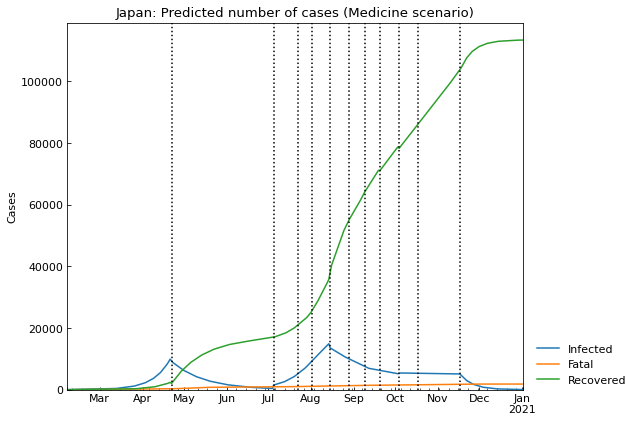

,Date,Confirmed,Fatal,Infected,Recovered
327,2020-12-29,115274,1833,51,113390
328,2020-12-30,115280,1833,46,113401
329,2020-12-31,115284,1833,41,113410
330,2021-01-01,115288,1833,37,113418
331,2021-01-02,115292,1833,33,113426


In [41]:
scenario.simulate(name="Medicine").tail()

### Compare the scenarios

In [42]:
scenario.describe()

,max(Infected),argmax(Infected),Infected on 02Jan2021,Fatal on 02Jan2021,11th_Rt
Main,14917,14Aug2020,4788,1988,-
Medicine,14917,14Aug2020,33,1833,0.5


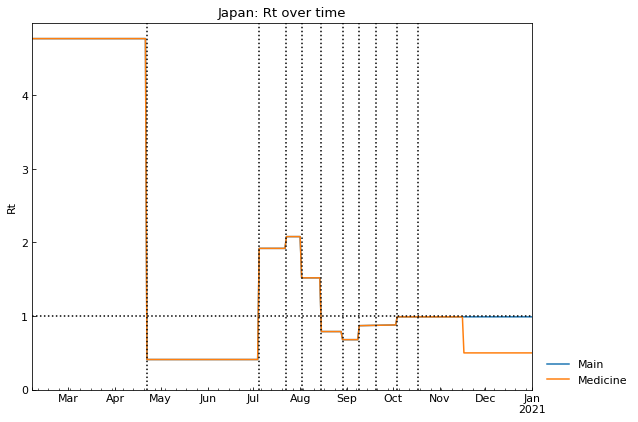

In [43]:
_ = scenario.history(target="Rt")

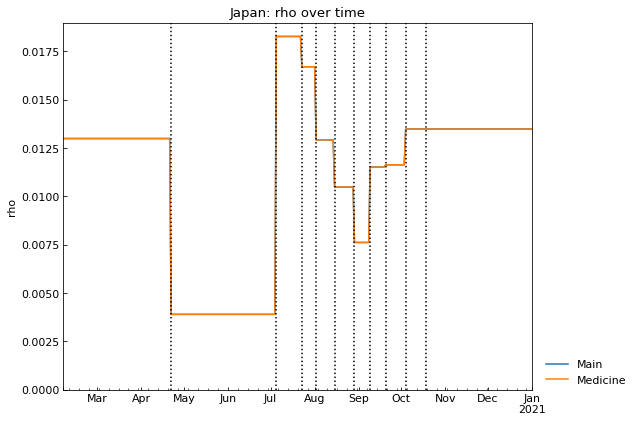

In [44]:
_ = scenario.history(target="rho")

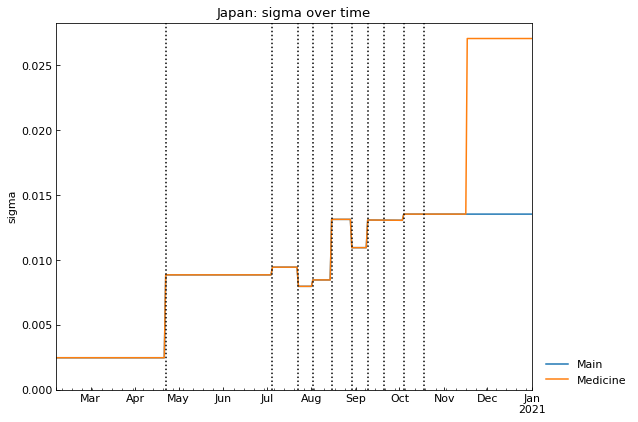

In [45]:
_ = scenario.history(target="sigma")

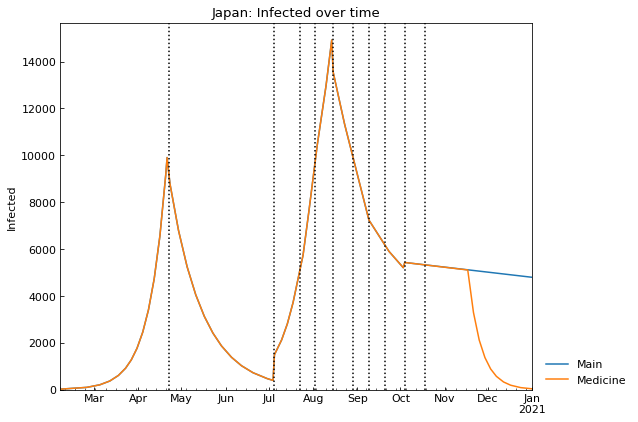

In [46]:
_ = scenario.history(target="Infected")

### Change rate of parameters in main scenario

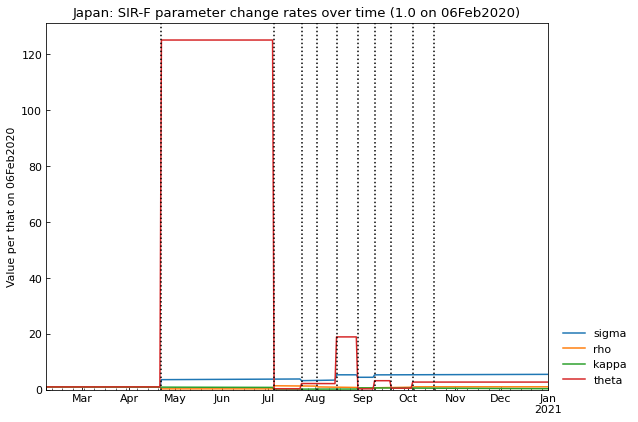

In [47]:
# >= 2.8.3-alpha.new.224 (will be included in 2.9.0)
_ = scenario.history_rate(name="Main")